In [0]:
import numpy as np #importando numpy
import pandas as pd #importando pandas
from sklearn.linear_model import LinearRegression # Importando o modelo de regresão linear unevariada
from sklearn.metrics import r2_score # Metodo para calculo do coefienciente  de determinação 
import matplotlib.pyplot as plt # importando matplotlib

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Dataset disponibilizado no github: https://github.com/LucasOliveiraS/regressao-linear-python/blob/master/animals-weight.xlsx
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/My_Codes/Machine_Learning/datasets/animals-weight.xlsx')

In [33]:
df.shape # Verificando o tamanho do meu dataset

(60, 3)

Text(0, 0.5, 'Brain Weight')

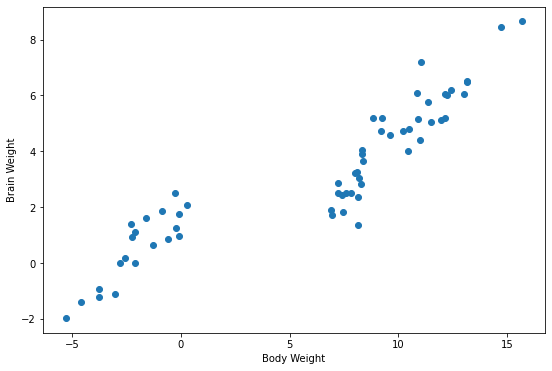

In [34]:
figure = plt.figure(figsize=(9,6))
plt.scatter(np.log(df['Body Weight']), np.log(df['Brain Weight']))
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')

In [35]:
df.head() # Visualizando as 5° linhas

,Animals,Body Weight,Brain Weight
0,Mountain beaver,1.35,8.1
1,Cow,465000.00,423.0
2,Grey wolf,36330.00,119.5
3,Goat,27660.00,115.0
4,Roe deer,14830.00,98.2


In [0]:
X=df['Body Weight'].values  # Variavel preditora
Y=df['Brain Weight'].values # Variavel dependente
# O tamanho do cerebro dependente do tamanho do corpo do animal

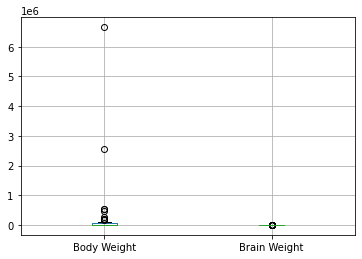

In [37]:
df[['Body Weight','Brain Weight']].boxplot() # Verificando possiveis outliers 

In [38]:
from scipy import stats # Verificando meu possivel outlier
z = np.abs(stats.zscore(df['Body Weight'].values))
threshold = 3
result = np.where(z > threshold)
df_outlier=df.iloc[result[0]]
df_outlier

,Animals,Body Weight,Brain Weight
30,African elephant,6654000.0,5712.0


In [0]:
def normalize(x): # Funçao que normaliza meus dados
    return np.array([(x[n] - min(x)) / (max(x) - 
           min(x)) for n in range(len(x))])

In [0]:
X = normalize(X) # Normalizando dados de X
Y = normalize(Y) # Normalizando dados de Y

In [0]:
reg= LinearRegression()
x_Reshaped= X.reshape((-1, 1)) # Colocando os dados em 2D (Linha, Coluna) / Utilizo -1 para não ser necessario informar a quantidade de linhas
regre = reg.fit (x_Reshaped,Y) # Realiza a regresão linear

In [0]:
prev =reg.predict(x_Reshaped) # Realiza a previsão

In [43]:
print('Y: ', reg.coef_, 'X: ', reg.intercept_)

Y:  [1.12529079] X:  0.016313477085328737


In [44]:
# R2 = (SQt - SQres) / SQt
CoeDeterminacao = r2_score(Y, prev)  # Utilizando o modulo de calculo do coeficiente de determinação
CoeDeterminacao

0.8725248831204703

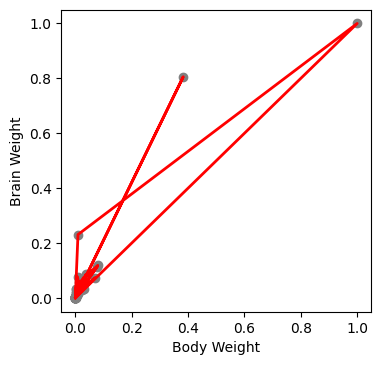

In [45]:
# Plotando os dados e suas ligações
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(X, Y,  color='gray') # Realiza o plot do gráfico de dispersão
plt.plot(X, Y, color='red', linewidth=2) 
plt.xlabel("Body Weight")
plt.ylabel("Brain Weight")
plt.show()

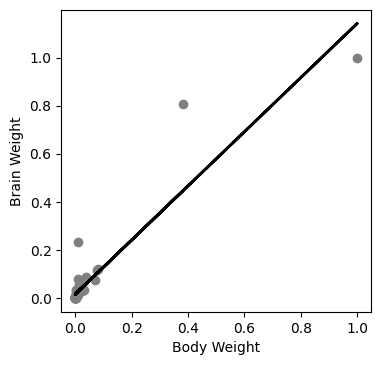

In [46]:
# Plotando linha linear que que melhor se ajusta aos dados
plt.figure(figsize=(4, 4), dpi=100)
plt.scatter(X, Y,  color='gray') # Realiza o plot do gráfico de dispersão
plt.plot(X, prev, color='black', linewidth=2) # Realiza o plot da previsão do treinamento, utilizando meu prev
plt.xlabel("Body Weight")
plt.ylabel("Brain Weight")
plt.show()